In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import importlib

In [2]:
# ------------------------------ RELOCATE WORKING DIRECTORY ----------------------------------------

# -------------- PART 0: CHOOSE CIRCUIT AND SET UP FOLDER --------------

# Choose circuit
circuit = "posneg"

# Import circuit config file
config = importlib.import_module(circuit)

# Define the subfolder name
folder_name = f"NGSA2_{circuit}"

# Create folder if not yet exist
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Jump to folder
os.chdir(folder_name)

# Prompt new folder name
print(f"Current working directory: {os.getcwd()}")


# -------------- PART 0b: DEFINE DYNAMICAL SYSTEM --------------

# dx/dt
Equ1 = config.Equ1

# dy/dt
Equ2 = config.Equ2
    
# Define function to evaluate vector field
def Equs(P, t, params):
    x = P[0]
    y = P[1]
    beta_x = params[0]
    beta_y = params[1]
    n      = params[2]
    val0 = Equ1(x, y, beta_x, n)
    val1 = Equ2(x, y, beta_y, n)
    return np.array([val0, val1])

# Define values
t = 0.0

# -------------- PART 0c: DEFINE SENSITIVITY FUNCTIONS --------------

# Define analytical sensitivity expressions
S_betax_xss_analytic = config.S_betax_xss_analytic
S_betax_yss_analytic = config.S_betay_xss_analytic
S_betay_xss_analytic = config.S_betay_xss_analytic
S_betay_yss_analytic = config.S_betay_yss_analytic
S_n_xss_analytic = config.S_n_xss_analytic
S_n_yss_analytic = config.S_n_yss_analytic

# -------------- PART 0d: CHOOSE SENSITIVITY FUNCTIONS --------------

# Print prompt
print("""
We have the following sensitivity functions:
0. |S_betax_xss|
1. |S_betax_yss|
2. |S_betay_xss|
3. |S_betay_yss|
4. |S_n_xss|
5. |S_n_yss|
""")

# Choose pair of functions
choice1 = int(input("Please select first option number:"))
choice2 = int(input("Please select second option number:"))

def senpair(choice1, choice2):
    # Map each label to its corresponding analytical function
    sensitivity_funcs = {
        "|S_betax_xss|": S_betax_xss_analytic,
        "|S_betax_yss|": S_betax_yss_analytic,
        "|S_betay_xss|": S_betay_xss_analytic,
        "|S_betay_yss|": S_betay_yss_analytic,
        "|S_n_xss|":     S_n_xss_analytic,
        "|S_n_yss|":     S_n_yss_analytic
    }

    # Labels in consistent order
    sensitivity_labels = list(sensitivity_funcs.keys())

    # Select based on user choice
    label1, func1 = sensitivity_labels[choice1], sensitivity_funcs[sensitivity_labels[choice1]]
    label2, func2 = sensitivity_labels[choice2], sensitivity_funcs[sensitivity_labels[choice2]]

    # Return both the labels and the function handles
    return label1, func1, label2, func2

# -------------- PART 0e: CHANGING DIRECTORIES --------------

# Define the subfolder name
subfolder_name = f"NSGA2_sensfuncs_{choice1}_and_{choice2}"

# Create folder if not yet exist
if not os.path.exists(subfolder_name):
    os.makedirs(subfolder_name)

# Jump to folder
os.chdir(subfolder_name)

# Prompt new folder name
print(f"Current working directory: {os.getcwd()}")



Current working directory: /Users/nt625/Documents/GitHub/SA/Nam/NSGA2_PosNeg/NGSA2_posneg

We have the following sensitivity functions:
0. |S_betax_xss|
1. |S_betax_yss|
2. |S_betay_xss|
3. |S_betay_yss|
4. |S_n_xss|
5. |S_n_yss|

Current working directory: /Users/nt625/Documents/GitHub/SA/Nam/NSGA2_PosNeg/NGSA2_posneg/NSGA2_sensfuncs_0_and_1


In [3]:
label1, func1, label2, func2 = senpair(choice1, choice2)

In [4]:
data = np.load("Data_NSGA2_PosNeg.npz", allow_pickle=True)

all_F       = data["all_F"]        # shape: (n_pop, n_gen) — each entry is a Pareto front
popsize_list = data["popsize_list"]  # shape: (n_pop,)
gens_list    = data["gens_list"]     # shape: (n_gen,)

all_time = data["all_time"]

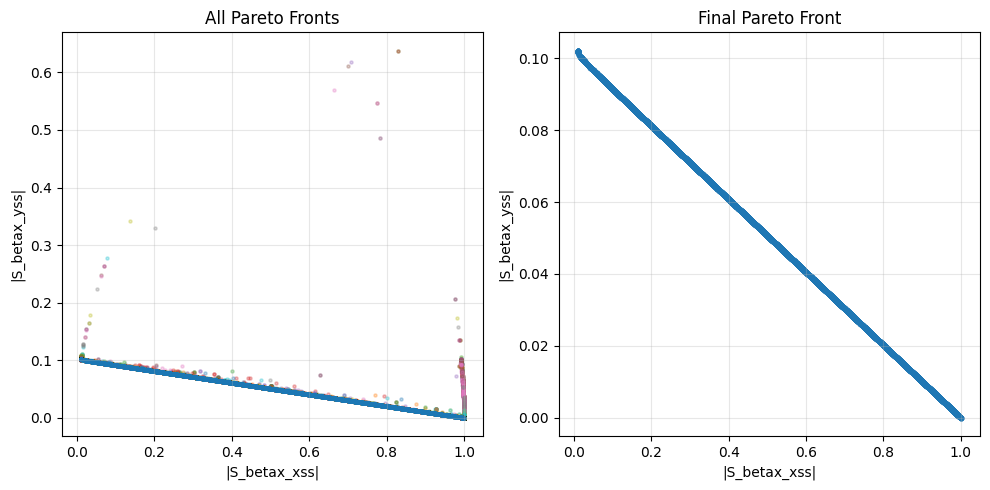

In [5]:
n_pop = len(popsize_list)
n_gen = len(gens_list)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# -------------------------
# LEFT SUBPLOT — All Fronts
# -------------------------
ax_left = axes[0]

for i in range(n_pop):        # loop over population sizes
    for j in range(n_gen):    # loop over generations
        F = all_F[i, j]       # shape (N_points, 2)
        ax_left.scatter(F[:, 0], F[:, 1], s=5, alpha=0.3)

ax_left.set_title("All Pareto Fronts")
ax_left.set_xlabel(label1)
ax_left.set_ylabel(label2)
ax_left.grid(alpha=0.3)

# -------------------------
# RIGHT SUBPLOT — Final Front
# -------------------------
ax_right = axes[1]

pf_final = all_F[-1, -1]     # last population size & last generation

ax_right.scatter(pf_final[:, 0], pf_final[:, 1], s=10)
ax_right.set_title("Final Pareto Front")
ax_right.set_xlabel(label1)
ax_right.set_ylabel(label2)
ax_right.grid(alpha=0.3)

plt.tight_layout()
plt.show()

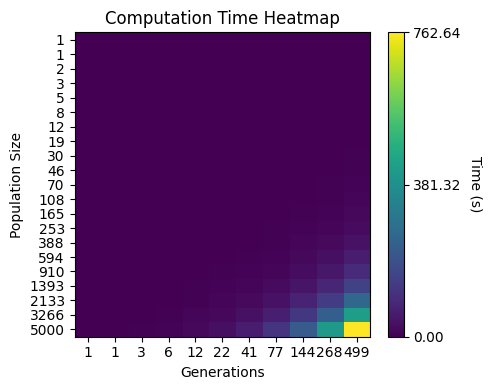

In [6]:
# Example matrix
data = all_time   # shape (n_pop, n_gen)

vmin = np.min(data)
vmax = np.max(data)

plt.figure(figsize=(5, 4))    # <<< wider heatmap

# Heatmap
im = plt.imshow(data, cmap="viridis", vmin=vmin, vmax=vmax, aspect='auto')

# Colorbar
cbar = plt.colorbar(im)
cbar.set_label("Time (s)", rotation=270, labelpad=15)

# Show min/mid/max on colorbar
cbar.set_ticks([vmin, (vmin+vmax)/2, vmax])
cbar.set_ticklabels([f"{vmin:.2f}", f"{(vmin+vmax)/2:.2f}", f"{vmax:.2f}"])

# Axis labels & ticks
plt.xlabel("Generations")
plt.ylabel("Population Size")

plt.xticks(np.arange(len(gens_list)), gens_list)
plt.yticks(np.arange(len(popsize_list)), popsize_list)

plt.title("Computation Time Heatmap")

plt.tight_layout()
plt.show()